In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
df = pd.read_csv('./data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0.0
4,4,2013-01-01,1,BOOKS,0.000,0.0
...,...,...,...,...,...,...
1597934,1597934,2015-06-18,44,DAIRY,1836.000,4.0
1597935,1597935,2015-06-18,44,DELI,454.984,0.0
1597936,1597936,2015-06-18,44,EGGS,370.000,2.0
1597937,1597937,2015-06-18,44,FROZEN FOODS,359.459,3.0


In [43]:
# Nueva columna con el formato: YYYY-MM
df['fecha'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,fecha
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013-01
1,1,2013-01-01,1,BABY CARE,0.000,0.0,2013-01
2,2,2013-01-01,1,BEAUTY,0.000,0.0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,2013-01
4,4,2013-01-01,1,BOOKS,0.000,0.0,2013-01
...,...,...,...,...,...,...,...
1597934,1597934,2015-06-18,44,DAIRY,1836.000,4.0,2015-06
1597935,1597935,2015-06-18,44,DELI,454.984,0.0,2015-06
1597936,1597936,2015-06-18,44,EGGS,370.000,2.0,2015-06
1597937,1597937,2015-06-18,44,FROZEN FOODS,359.459,3.0,2015-06


In [44]:
# Ventas por mes en todas las tiendas tomando en cuenta todos los productos
por_mes = df[['fecha', 'sales']].groupby('fecha').sum()
por_mes

,sales
fecha,
2013-01,1.032762e+07
2013-02,9.658960e+06
2013-03,1.142850e+07
2013-04,1.099346e+07
2013-05,1.159770e+07
2013-06,1.168934e+07
2013-07,1.125740e+07
2013-08,1.173779e+07
2013-09,1.179293e+07


Text(0.5, 1.0, 'Ventas por mes por año')

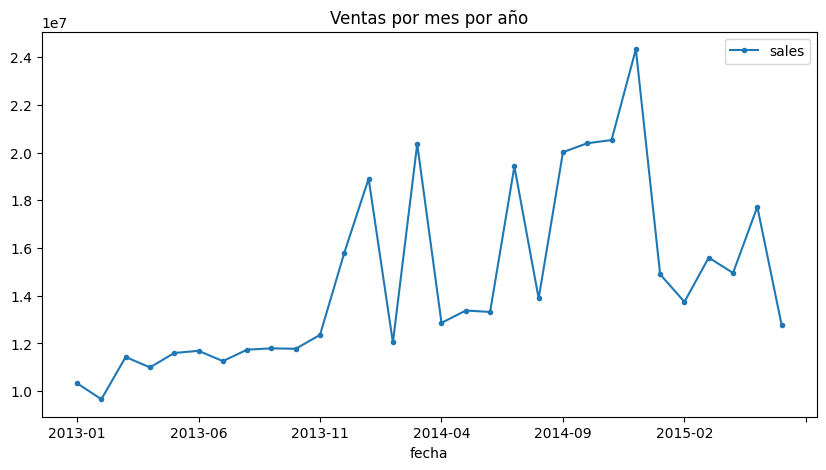

In [45]:
por_mes.plot.line(
    y='sales', 
    style='.-',
    figsize=(10, 5)
)
plt.title('Ventas por mes por año')

Text(0.5, 1.0, 'Ventas por mes por año')

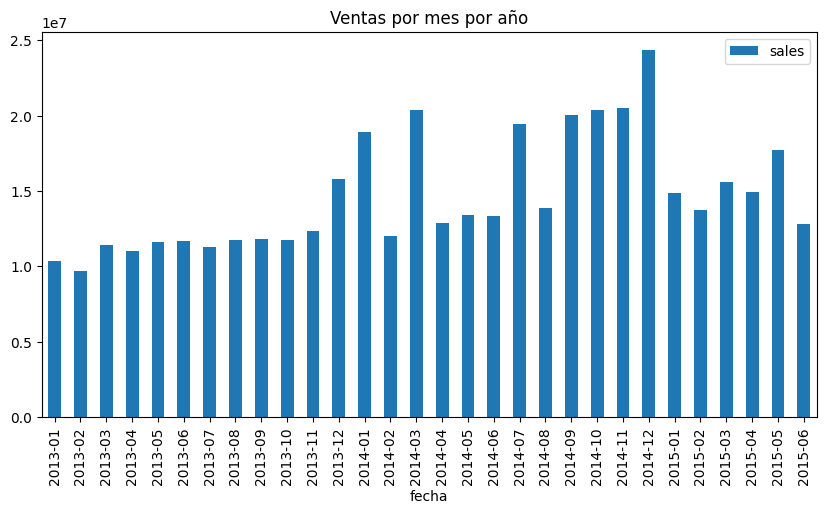

In [46]:
por_mes.plot.bar(
    y='sales', 
    figsize=(10, 5)
)
plt.title('Ventas por mes por año')

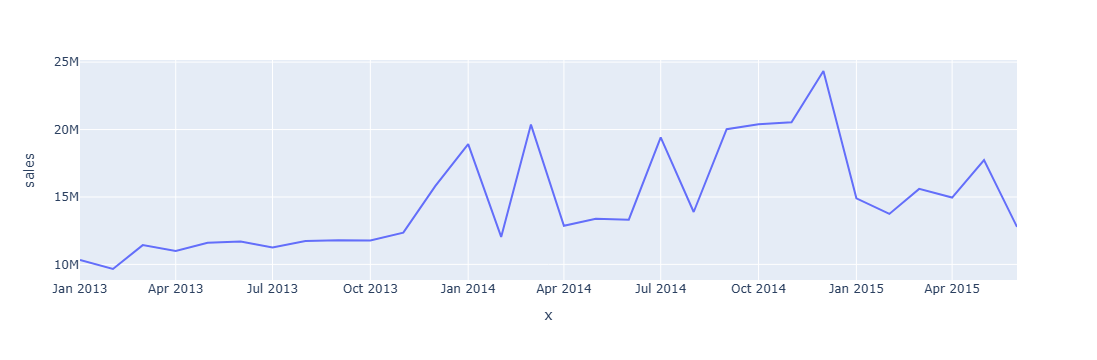

In [47]:
import plotly.express as px
fig = px.line(
    por_mes,
    x=por_mes.index.values,
    y='sales'
)
fig.show()

In [48]:
df['anio'] = df['date'].apply(lambda x: x[:4])
df

,id,date,store_nbr,family,sales,onpromotion,fecha,anio
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013-01,2013
1,1,2013-01-01,1,BABY CARE,0.000,0.0,2013-01,2013
2,2,2013-01-01,1,BEAUTY,0.000,0.0,2013-01,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,2013-01,2013
4,4,2013-01-01,1,BOOKS,0.000,0.0,2013-01,2013
...,...,...,...,...,...,...,...,...
1597934,1597934,2015-06-18,44,DAIRY,1836.000,4.0,2015-06,2015
1597935,1597935,2015-06-18,44,DELI,454.984,0.0,2015-06,2015
1597936,1597936,2015-06-18,44,EGGS,370.000,2.0,2015-06,2015
1597937,1597937,2015-06-18,44,FROZEN FOODS,359.459,3.0,2015-06,2015


In [49]:
df_2015 = df[
    (df['anio'] == '2015') & 
    (df['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))
]
df_2015

,id,date,store_nbr,family,sales,onpromotion,fecha,anio
1297304,1297304,2015-01-01,1,DAIRY,0.000,0.0,2015-01,2015
1297320,1297320,2015-01-01,1,MEATS,0.000,0.0,2015-01,2015
1297328,1297328,2015-01-01,1,SEAFOOD,0.000,0.0,2015-01,2015
1297337,1297337,2015-01-01,10,DAIRY,0.000,0.0,2015-01,2015
1297353,1297353,2015-01-01,10,MEATS,0.000,0.0,2015-01,2015
...,...,...,...,...,...,...,...,...
1597892,1597892,2015-06-18,42,SEAFOOD,0.000,0.0,2015-06,2015
1597901,1597901,2015-06-18,43,DAIRY,200.000,0.0,2015-06,2015
1597917,1597917,2015-06-18,43,MEATS,168.708,14.0,2015-06,2015
1597925,1597925,2015-06-18,43,SEAFOOD,0.000,0.0,2015-06,2015


In [50]:
agrupacion = df_2015[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
agrupacion

sales
fecha   family               
2015-01 DAIRY    1.134521e+06
        MEATS    5.431177e+05
        SEAFOOD  4.046584e+04
2015-02 DAIRY    1.020747e+06
        MEATS    4.987351e+05
        SEAFOOD  3.606656e+04
2015-03 DAIRY    1.234851e+06
        MEATS    5.465172e+05
        SEAFOOD  4.380847e+04
2015-04 DAIRY    1.181180e+06
        MEATS    5.223043e+05
        SEAFOOD  3.998347e+04
2015-05 DAIRY    1.293308e+06
        MEATS    5.916919e+05
        SEAFOOD  4.250683e+04
2015-06 DAIRY    7.239060e+05
        MEATS    3.366868e+05
        SEAFOOD  2.207863e+04

In [52]:
pivote = agrupacion.unstack() 
# equivale a: agrupacion.reset_index(1).pivot(columns=['family'])
pivote

sales                             
family       DAIRY          MEATS       SEAFOOD
fecha                                          
2015-01  1134521.0  543117.728891  40465.835012
2015-02  1020747.0  498735.076839  36066.561003
2015-03  1234851.0  546517.159221  43808.473074
2015-04  1181180.0  522304.280744  39983.471003
2015-05  1293308.0  591691.899734  42506.832015
2015-06   723906.0  336686.784889  22078.625002

In [53]:
pivote.columns = pivote.columns.droplevel()
pivote

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,723906.0,336686.784889,22078.625002


<Axes: xlabel='fecha'>

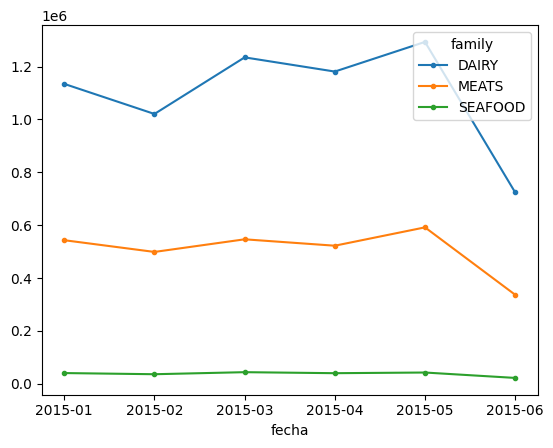

In [54]:
pivote.plot.line(
    style='.-'
)

array([<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
       <Axes: xlabel='fecha'>], dtype=object)

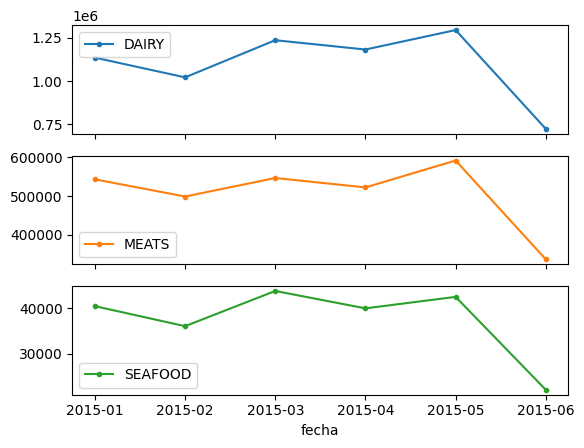

In [55]:
pivote.plot.line(
    style='.-',
    subplots=True
)

array([<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
       <Axes: xlabel='fecha'>], dtype=object)

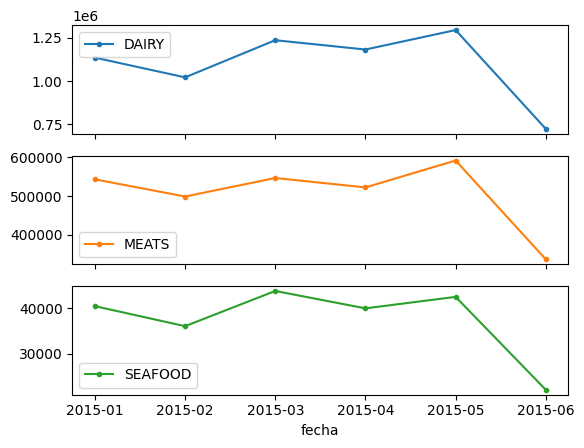

In [55]:
pivote.plot.line(
    style='.-',
    subplots=True
)

array([<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
       <Axes: xlabel='fecha'>], dtype=object)

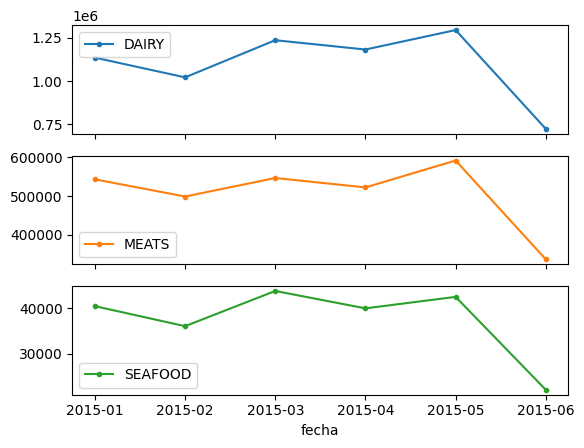

In [55]:
pivote.plot.line(
    style='.-',
    subplots=True
)

array([<Axes: xlabel='Fecha', ylabel='Ventas'>,
       <Axes: xlabel='Fecha', ylabel='Ventas'>], dtype=object)

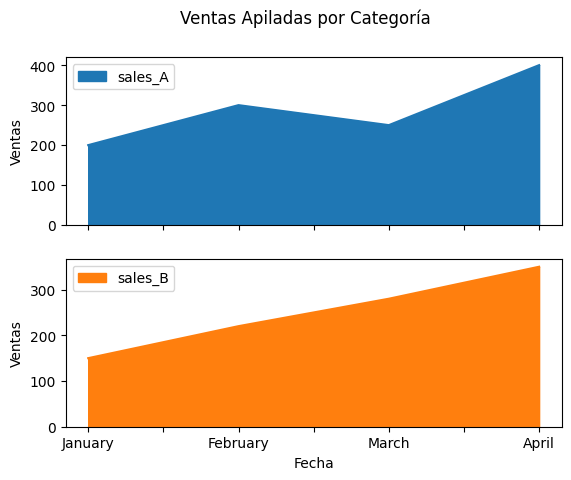

In [25]:
# Gráfico de área apilado con subgráficos para los datos en `pivote`
pivote.plot.area(
    stacked=True,
    subplots=True,
    xlabel="Fecha",
    ylabel="Ventas",
    title="Ventas Apiladas por Categoría"
)


<Axes: title={'center': 'Compras Apiladas por Familia'}, xlabel='Fecha', ylabel='Compras'>

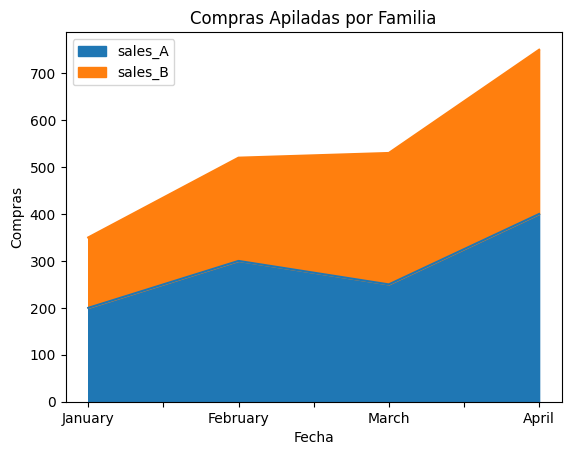

In [26]:
# Gráfico de área apilado mostrando las compras por familia
pivote.plot.area(
    stacked=True,
    xlabel="Fecha",
    ylabel="Compras",
    title="Compras Apiladas por Familia"
)


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


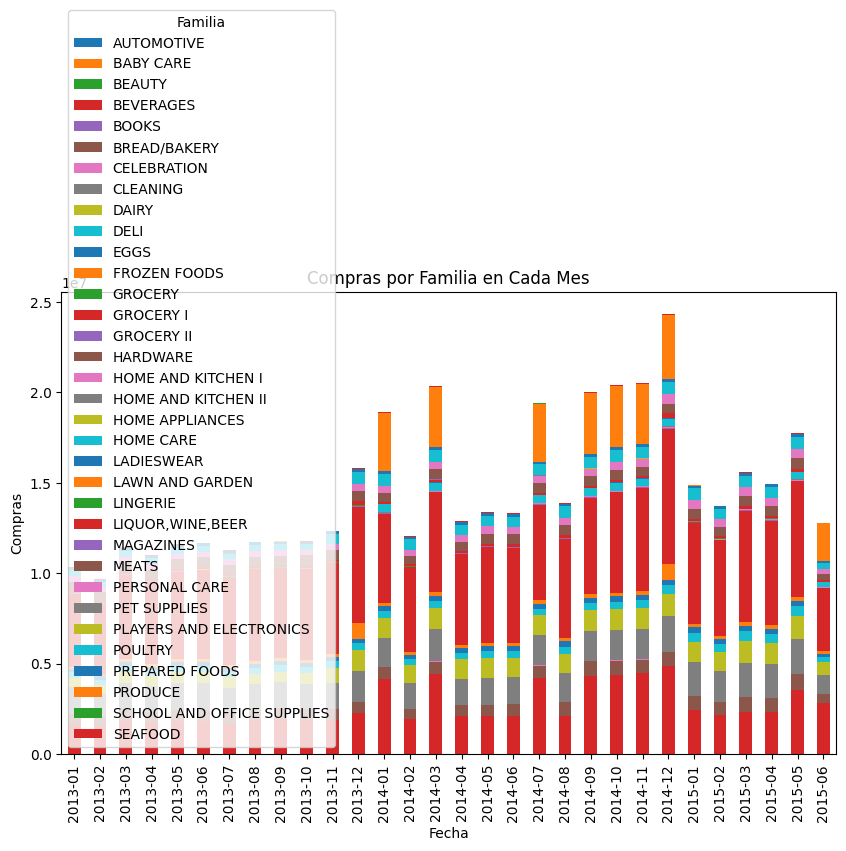

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo de datos si está disponible en el entorno actual
data = pd.read_csv('./data/tienda_ventas.csv')

# Confirma que las columnas están correctamente cargadas
print(data.columns)

# Verifica que `fecha` esté en el formato 'YYYY-MM', o crea la columna si es necesario
if 'fecha' not in data.columns and 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data['fecha'] = data['date'].dt.to_period('M').astype(str)

# Agrupa los datos por 'fecha' y 'family' y calcula la suma de las ventas para cada combinación
compras_por_producto = data.groupby(['fecha', 'family'])['sales'].sum().unstack().fillna(0)

# Gráfico de barras apilado para mostrar las compras por familia en cada mes
compras_por_producto.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Compras")
plt.title("Compras por Familia en Cada Mes")
plt.legend(title="Familia")
plt.show()
